In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read,write
from IPython.display import Audio
from numpy.fft import fft, ifft
#from pca import pca
from sklearn.decomposition import PCA
import pylab
import scipy.fftpack
import wavio
import librosa

from pydub import AudioSegment
from pydub.playback import play
import pydub
from sklearn.linear_model import LinearRegression




In [15]:
#Preforms fourier transform on data and returns the frequency space data
def freqDataML(data, Fs, xlim=20000):
    spectrum = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(spectrum), d=1/Fs)
    return abs(spectrum), frequencies

#Preforms fourier transform on data and generates a graph for analysis, also returns frequency space data
def freqData(data, Fs, xlim=20000):
    spectrum = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(spectrum), d=1/Fs)
    plt.plot(frequencies, abs(spectrum))
    plt.xlim(0,xlim)
    plt.show()
    print(spectrum.shape)
    print(frequencies.shape)

    return spectrum, frequencies
    
#Creates a wave with specified duration, frequency, and sampling rate, returns rate and data
def simpleWave(Fs, T, f):
    # Parameters
    rate = Fs    # samples per second
    T = T           # sample duration (seconds)
    f = f       # sound frequency (Hz)
    # Compute waveform samples
    t = np.linspace(0, T, T*rate, endpoint=False)
    x = np.sin(2*np.pi * f * t)
    return rate, x

#Sets up a list of frequencies raning from 20 to 20000 at increments of 20 
#returns the new default frequency list, reverts theta to a list of ones
#and returns the difference in each frequency in the list
def setup():
    z=[]
    Fs1 = 44100 #44100
    T = 1 #sample duration
    t = np.linspace(0, T, T*Fs1, endpoint=False)
    hzspace = 20
    for i in range(int(22050/hzspace)):
        z.append(np.sin(2*np.pi * i * hzspace * t))
    z = np.array(z)
    theta = np.ones(z.T.shape[1])
    ztheta = np.dot(z.T,theta)
    return z, theta, hzspace

Sampling Frequency is:  44100
6.931587587600801e-06


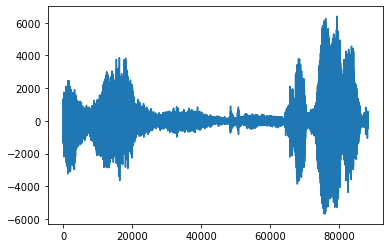

In [16]:
#Sample 2 seconds of Audio Clip
Fs1, data1 = read('AudioClips/Ihateyou.wav')
hzConv1 = librosa.get_duration(filename='AudioClips/RunAway.wav')/len(data1)
print("Sampling Frequency is: ", Fs1)
print(hzConv1)
data12 = data1[Fs1:Fs1*3, 0]
plt.figure()
plt.plot(data12)
plt.show()
Audio(data12, rate=Fs1)

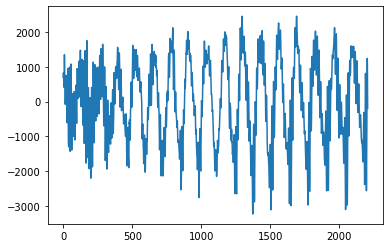

In [17]:
#Sample a small batch of the audio clip
data1s = data1[Fs1:Fs1+2205, 0]
plt.figure()
plt.plot(data1s)
plt.show()
Audio(data1s, rate=Fs1)

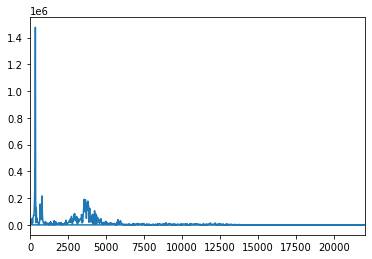

(2205,)
(2205,)


In [18]:
#Display the frequency space of the data
spec, freq = freqData(data1s, Fs1, 22050)



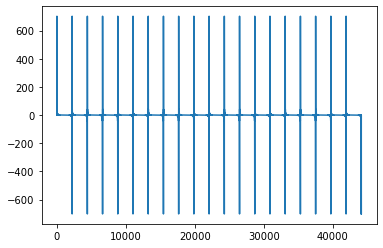

In [19]:
#Display audio clip of the unmodified list of waves
z, theta, hzspace = setup()
ztheta = np.dot(z.T,theta)
plt.figure()
plt.plot(ztheta)
plt.show()
zf = []
Audio(ztheta, rate=Fs1)


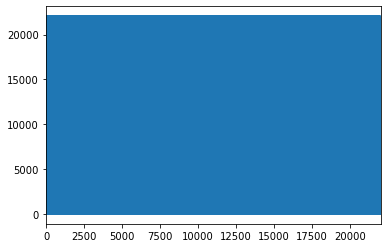

(44100,)
(44100,)


In [20]:
#Display the frequency space of the unmodified list
_ = freqData(ztheta, Fs1, 22050)

In [21]:
#Weight each respective wave frequency with the same weight given in the FFT of the source data Audio
zn = np.array([None]*len(z))
for i in range(int(22050/hzspace)):
    zn[i] = z[i]*spec[i]
ztheta = np.dot(zn.T,theta)

C:\Users\amada\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


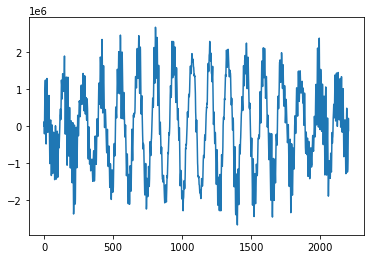

c:\users\amada\pycharmprojects\tflearning\venv\lib\site-packages\IPython\lib\display.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [22]:
#Plot the wave produced
plt.figure()
plt.plot(ztheta[:2205])
plt.show()
Audio(ztheta[:2205], rate=Fs1)

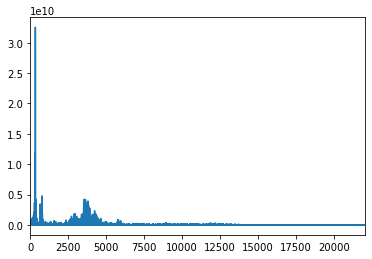

(44100,)
(44100,)


In [23]:
#Plot the frequency space of the wave produced
_ = freqData(ztheta, Fs1, 22050)

In [24]:
#In small steps recreate the audio clip scratch using a sum of waves multiplied by weights in the FFT of the data
#Returns a list of lists that containt small batches of audio clips
def audioReplicate(iT):
    startT = 44100
    spacer = np.zeros(1000)
    cts = 0
    for i in range(40):
        
        zn = np.array([None]*len(z))
        dat = data1[startT:startT+iT, 0]
        spec, freq = freqDataML(dat, Fs1, 22050)
        
        for j in range(int(22050/hzspace)):
            rand = np.random.randint(30)
            zn[j] = z[j]*spec[j]
        ztheta = np.dot(zn.T,theta)
        reduceS1 = 50
        reduceS2 = 120
        reduceS3 = 240
        ztheta[0:reduceS1] = ztheta[0:reduceS1]/7
        ztheta[(iT-reduceS1):iT] =  ztheta[(iT-reduceS1):iT]/7
        ztheta[reduceS1:reduceS2] = ztheta[reduceS1:reduceS2]/5
        ztheta[(iT-reduceS2):iT-reduceS1] =  ztheta[(iT-reduceS2):iT-reduceS1]/5
        ztheta[reduceS2:reduceS3] = ztheta[reduceS2:reduceS3]/2
        ztheta[(iT-reduceS3):iT-reduceS2] =  ztheta[(iT-reduceS3):iT-reduceS2]/2
        #zsign = np.where(ztheta[:(iT)] >= 0, ztheta[:(iT)], -1)
        #zsign = np.where(zsign < 0, zsign, 1)
        ztheta[0] = cts
        zf.extend((ztheta[:(iT)]))#*zsign
        
        #zf.extend(spacer)
        startT = startT + iT
        cts = ztheta[2204]
        print(i)
    return zf
        
    

In [13]:
#Perform replication
zf = []
zf = audioReplicate(2205)
zff = np.array(zf)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


'print(zff.shape[0])\nredS = 600\niT = 2205\nfor x in range(zff.shape[0]-1):\n    m = np.abs(np.mean(zff[x,(iT-redS):iT] + zff[x+1,0:redS]))\n    print(m)\n    zff[x,(iT-redS):iT] = zff[x,(iT-redS):iT]-m\n    zff[x+1,0:redS] = zff[x+1,0:redS]-m\n    print(x)\n\nprint(zff.shape)'

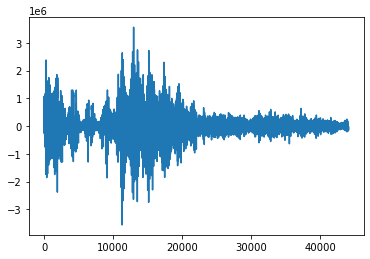

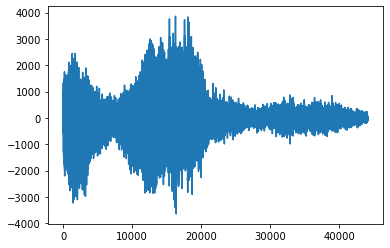

In [15]:
#Plot original clip and synthesis clip, output audio if synthesized clip
#zfff = zff.flatten()*1
plt.figure()
plt.plot(zf[0:2205*20])
plt.show()
plt.figure()
plt.plot(data12[:2205*20])
plt.show()
Audio(zf, rate=Fs1)

In [16]:
#Output Audio of originial clip
'''_ = freqData(zf, Fs1, 22050)
print(z)'''
Audio(data12[:2205*40], rate=Fs1)